# Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify. 

In this cookbook recipe, we will cover:

- Downloading data for HRP
- Using HRP to find the minimum variance portfolio
- Plotting dendrograms

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)


## Downloading data

HRP only requires historical returns

In [1]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

     |████████████████████████████████| 61 kB 2.5 MB/s 
     |████████████████████████████████| 63 kB 948 kB/s 
     |████████████████████████████████| 6.4 MB 36.5 MB/s 
     |████████████████████████████████| 2.7 MB 32.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.5.1'

In [3]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  15 of 15 completed


,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2022-02-07,171.660004,123.669998,48.509998,816.919983,109.410004,142.509995,545.280029,73.150002,376.130005,247.279999,4.81,211.289993,197.240005,52.250000,137.960007
2022-02-08,174.830002,128.229996,49.380001,807.390015,110.830002,142.479996,554.229980,75.360001,374.369995,251.080002,5.04,212.949997,200.320007,52.299999,137.990005
2022-02-09,176.279999,132.850006,49.279999,813.000000,104.790001,147.229996,579.400024,78.290001,381.369995,267.049988,5.10,216.639999,201.369995,52.139999,137.690002
2022-02-10,172.119995,125.769997,49.049999,778.190002,105.320000,152.160004,557.580017,76.400002,374.390015,258.239990,4.94,213.839996,194.410004,51.220001,136.080002
2022-02-11,168.639999,113.180000,47.919998,772.489990,104.239998,149.470001,535.809998,73.980003,369.769989,239.490005,4.91,211.559998,192.710007,52.730000,135.330002


In [4]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2022-02-07,-0.004235,0.000566,0.004764,0.008767,0.008480,0.003450,0.002316,-0.008404,-0.015882,0.016818,0.006276,-0.012848,0.001829,0.016537,-0.009833
2022-02-08,0.018467,0.036872,0.017935,-0.011666,0.012979,-0.000211,0.016413,0.030212,-0.004679,0.015367,0.047817,0.007857,0.015616,0.000957,0.000217
2022-02-09,0.008294,0.036029,-0.002025,0.006948,-0.054498,0.033338,0.045414,0.038880,0.018698,0.063605,0.011905,0.017328,0.005242,-0.003059,-0.002174
2022-02-10,-0.023599,-0.053293,-0.004667,-0.042817,0.005058,0.033485,-0.037660,-0.024141,-0.018302,-0.032990,-0.031373,-0.012925,-0.034563,-0.017645,-0.011693
2022-02-11,-0.020218,-0.100103,-0.023038,-0.007325,-0.010254,-0.017679,-0.039044,-0.031675,-0.012340,-0.072607,-0.006073,-0.010662,-0.008744,0.029481,-0.005511


## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [5]:
from pypfopt import HRPOpt

In [6]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.0392),
             ('AMD', 0.02686),
             ('BAC', 0.04106),
             ('BLK', 0.04323),
             ('CVS', 0.09302),
             ('DIS', 0.06036),
             ('INTU', 0.03654),
             ('JD', 0.04999),
             ('MA', 0.04346),
             ('NVDA', 0.0232),
             ('PBI', 0.08059),
             ('TGT', 0.08735),
             ('TM', 0.09986),
             ('UL', 0.16223),
             ('WMT', 0.11304)])

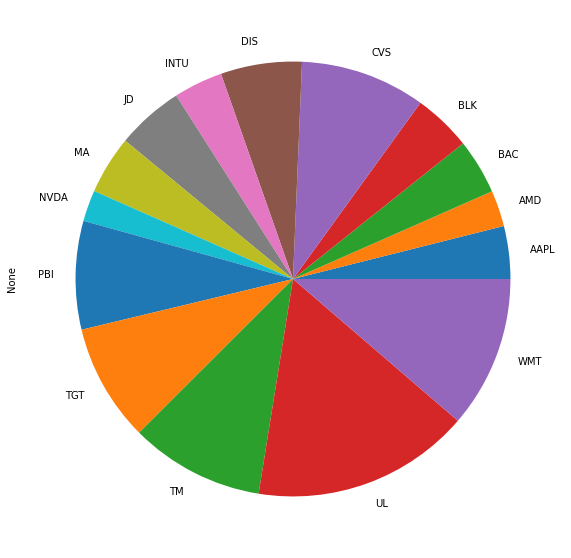

In [7]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [8]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual volatility: 19.0%
Sharpe Ratio: 0.95


## Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns

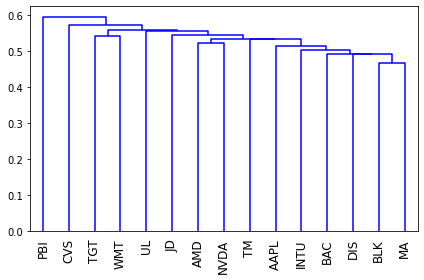

In [9]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp); 

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, AMD and NVDA (both semiconductor manufacturers) are grouped.